In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
read_data = pd.read_csv(r'C:\Users\X3\Downloads\total_cases.csv')

In [3]:
read_india = read_data[['date','India']]

In [4]:
read_india.head()

,date,India
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0


In [5]:
x = []
l = len(read_india['date'])
for n in range(0,l):
    x.append(n)
    

In [6]:
x = pd.DataFrame(x)

In [7]:
x.head()

,0
0,0
1,1
2,2
3,3
4,4


In [8]:
x.columns = ['day']

In [9]:
x

,day
0,0
1,1
2,2
3,3
4,4
...,...
102,102
103,103
104,104
105,105


In [10]:
read_india[['India']]

,India
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
102,7447.0
103,8356.0
104,9152.0
105,10363.0


In [11]:
y = x+read_india[['India']]

In [12]:
y = x.join(read_india[['India']])

In [13]:
y

,day,India
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
102,102,7447.0
103,103,8356.0
104,104,9152.0
105,105,10363.0


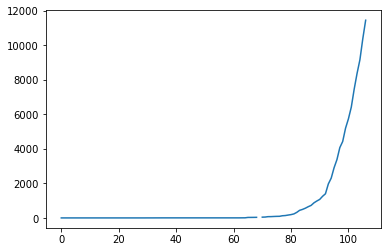

In [14]:
plt.plot(y['day'],y['India'])

In [15]:
y.isna().any()

day      False
India     True
dtype: bool

In [16]:
y['India'].fillna(method = 'pad', inplace=True)

In [17]:
y.isna().any()

day      False
India    False
dtype: bool

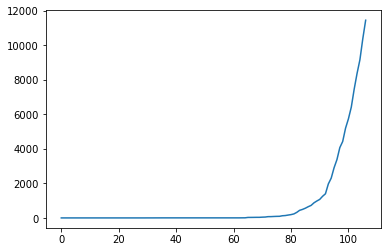

In [18]:
plt.plot(y['day'],y['India'])

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
pf = PolynomialFeatures()

In [21]:
scores = []
order = [1,2,3,4,5]
from sklearn.linear_model import LinearRegression

In [22]:
for i in order:
    pf = PolynomialFeatures(degree=i)
    x_polly = pf.fit_transform(y[['day']])
    lr = LinearRegression()
    lr.fit(x_polly, y[['India']])
    scores.append(lr.score(x_polly, y[['India']]))
    

In [23]:
scores

[0.3468314474870384,
 0.6835214686622801,
 0.8901823854699192,
 0.9746352982250274,
 0.9962484567464149]

In [24]:
pf

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [25]:
x_polly.dtype

dtype('float64')

In [26]:
type(x_polly)

numpy.ndarray

In [27]:
x_polly.ndim

2

In [38]:
trial_day = [[117]]
trial_day = pf.fit_transform(trial_day)


In [39]:
lr.predict(trial_day)

array([[30125.53963888]])